In [1]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torch.serialization import add_safe_globals
from timm.models.vision_transformer import VisionTransformer

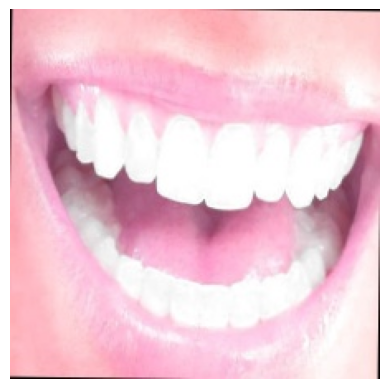

Predicted class: healthy


In [20]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


add_safe_globals({'VisionTransformer': VisionTransformer})
model = torch.load("Pre-Trained_ViT.pkl", weights_only=False, map_location='cpu')
model.eval()

from pathlib import Path

def preprocess_image(image_path, transform):
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

def predict_image(model, image_tensor, class_names, device='cpu'):
    image_tensor = image_tensor.to(device)
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        return class_names[predicted.item()]

def imshow_tensor(img_tensor, mean=[0.5]*3, std=[0.5]*3, title=None):
    img = img_tensor.clone().detach().cpu()
    for i in range(3):
        img[i] = img[i] * std[i] + mean[i]
    img = img.permute(1, 2, 0).numpy()

    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

image_path = "./Unzipped folder/Dataset/healthy_120.jpg" # Change the image path
class_names = ['Calculus','Caries','Gingivitis','Hypodontia','Mouth Ulcer','Tooth Discoloration','healthy'] 

img_tensor = preprocess_image(image_path, transform)
predicted_label = predict_image(model, img_tensor, class_names)

imshow_tensor(img_tensor[0])
print("Predicted class:", predicted_label)